<a href="https://colab.research.google.com/github/sitkaroy2020/SupportVectorRegression/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
Y = Y.reshape(len(Y),1)

In [8]:
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [9]:
from re import S
from sklearn.preprocessing import StandardScaler
SC_X = StandardScaler()
SC_Y = StandardScaler()
X = SC_X.fit_transform(X)
Y = SC_Y.fit_transform(Y)

In [10]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor = regressor.fit(X, Y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Predicting a new result

In [13]:
SC_Y.inverse_transform(regressor.predict(SC_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

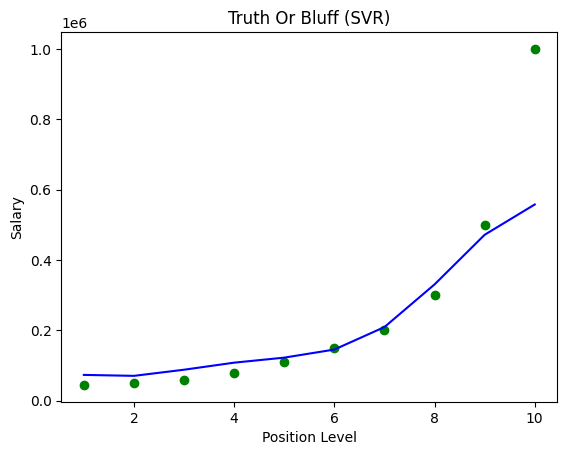

In [15]:
plt.scatter(SC_X.inverse_transform(X), SC_Y.inverse_transform(Y), color = 'green')
plt.plot(SC_X.inverse_transform(X), SC_Y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth Or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)